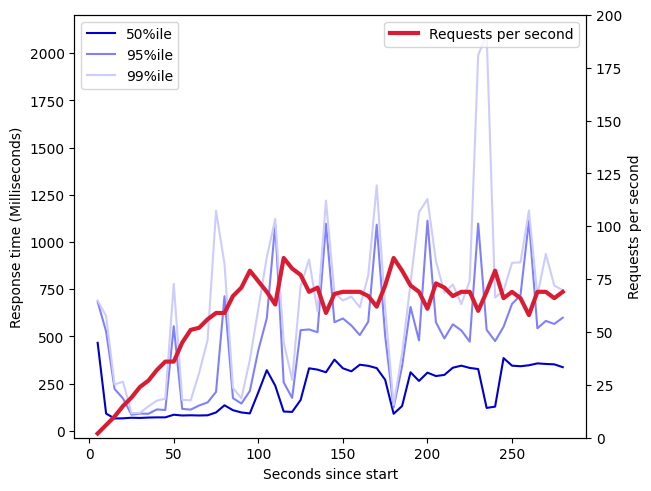

In [45]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_json('load_test_results.json')
df.set_index('WINDOW', inplace=True)
result = df[['QUERIES_PER_SECOND', 'PCT_50', 'PCT_95', 'PCT_99']][df.index < 57]
result.index = result.index * 5

fig, ax = plt.subplots(layout="constrained")

plt.plot(result["PCT_50"], label="50%ile", color="#0000cc")
plt.plot(result["PCT_95"], label="95%ile", color="#8080ff")
plt.plot(result["PCT_99"], label="99%ile", color="#ccccff")

plt.ylabel("Response time (Milliseconds)")
plt.xlabel("Seconds since start")
plt.legend(loc="upper left")

twin1 = ax.twinx()
twin1.plot(result["QUERIES_PER_SECOND"], color="#d91c32", label="Requests per second", linewidth=3)
plt.ylabel("Requests per second")
ax = plt.gca()
ax.set_ylim([0, 200])

plt.legend(loc="upper right")
plt.savefig("load_test_results.png")
plt.show()